In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras


trainpath = '/kaggle/input/daaaataaa/lego_train/'
testpath = '/kaggle/input/daaaataaa/lego_test/'
predpath = '/kaggle/input/daaaataaa/lego_predect/'



Using TensorFlow backend.


In [2]:
for folder in  os.listdir(trainpath + 'lego_train') : 
    files = gb.glob(pathname= str( trainpath +'lego_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')


For training data , found 66 in folder 2x2
For training data , found 66 in folder 1x1
For training data , found 66 in folder 2x4


In [3]:
    
for folder in  os.listdir(testpath +'lego_test') : 
    files = gb.glob(pathname= str( testpath +'lego_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 22 in folder 2x2
For testing data , found 22 in folder 1x1
For testing data , found 22 in folder 2x4


In [4]:
files = gb.glob(pathname= str(predpath +'lego_predect/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 28


In [5]:
# =============================================================================
# Check images
# =============================================================================
size = []
for folder in  os.listdir(trainpath +'lego_train') : 
    files = gb.glob(pathname= str( trainpath +'lego_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(118, 105, 3)    2
(170, 162, 3)    2
(175, 165, 3)    2
(114, 102, 3)    2
(109, 76, 3)     2
                ..
(195, 196, 3)    1
(201, 183, 3)    1
(107, 105, 3)    1
(297, 196, 3)    1
(172, 174, 3)    1
Length: 190, dtype: int64

In [6]:
size = []
for folder in  os.listdir(testpath +'lego_test') : 
    files = gb.glob(pathname= str( testpath +'lego_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()


(120, 107, 3)    2
(174, 170, 3)    1
(171, 310, 3)    1
(326, 137, 3)    1
(213, 326, 3)    1
                ..
(118, 109, 3)    1
(209, 178, 3)    1
(204, 323, 3)    1
(175, 174, 3)    1
(323, 245, 3)    1
Length: 65, dtype: int64

In [7]:
size = []
files = gb.glob(pathname= str(predpath +'lego_predect/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(198, 195, 3)    1
(111, 109, 3)    1
(209, 319, 3)    1
(176, 310, 3)    1
(107, 72, 3)     1
(175, 166, 3)    1
(210, 179, 3)    1
(110, 100, 3)    1
(331, 166, 3)    1
(170, 159, 3)    1
(217, 161, 3)    1
(219, 185, 3)    1
(114, 105, 3)    1
(102, 74, 3)     1
(336, 217, 3)    1
(210, 323, 3)    1
(197, 319, 3)    1
(118, 88, 3)     1
(195, 314, 3)    1
(122, 97, 3)     1
(124, 107, 3)    1
(218, 332, 3)    1
(169, 304, 3)    1
(119, 100, 3)    1
(102, 120, 3)    1
(202, 205, 3)    1
(183, 172, 3)    1
(200, 322, 3)    1
dtype: int64

In [8]:
code = {'1x1':0 ,'2x2':1,'2x4':2}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [9]:
s=100
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'lego_train') : 
    files = gb.glob(pathname= str( trainpath +'lego_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])
        
print(f'we have {len(X_train)} items in X_train')


we have 198 items in X_train


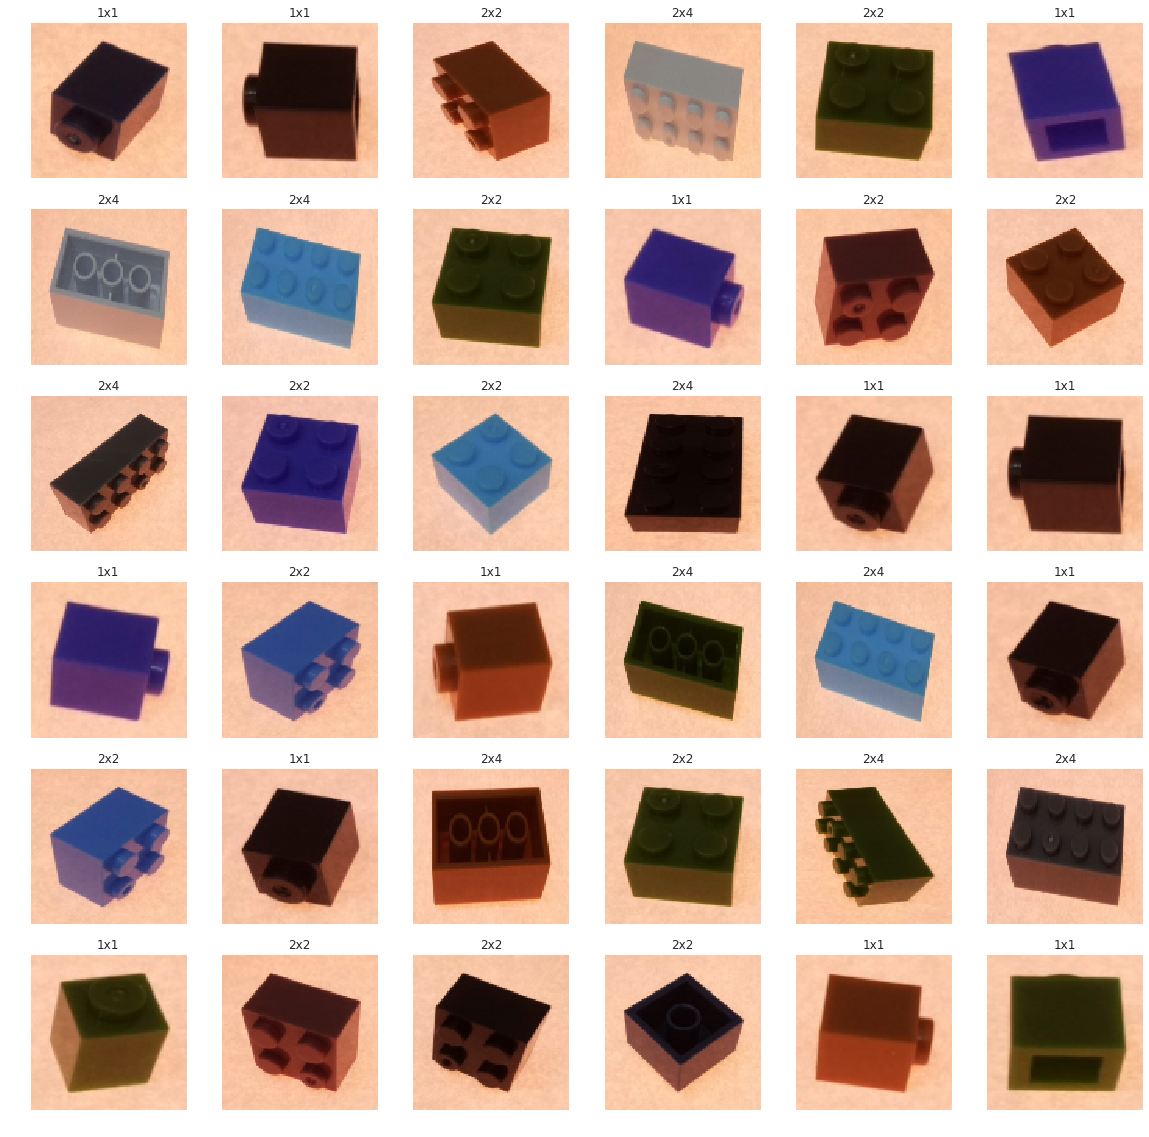

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))
    

we have 66 items in X_test


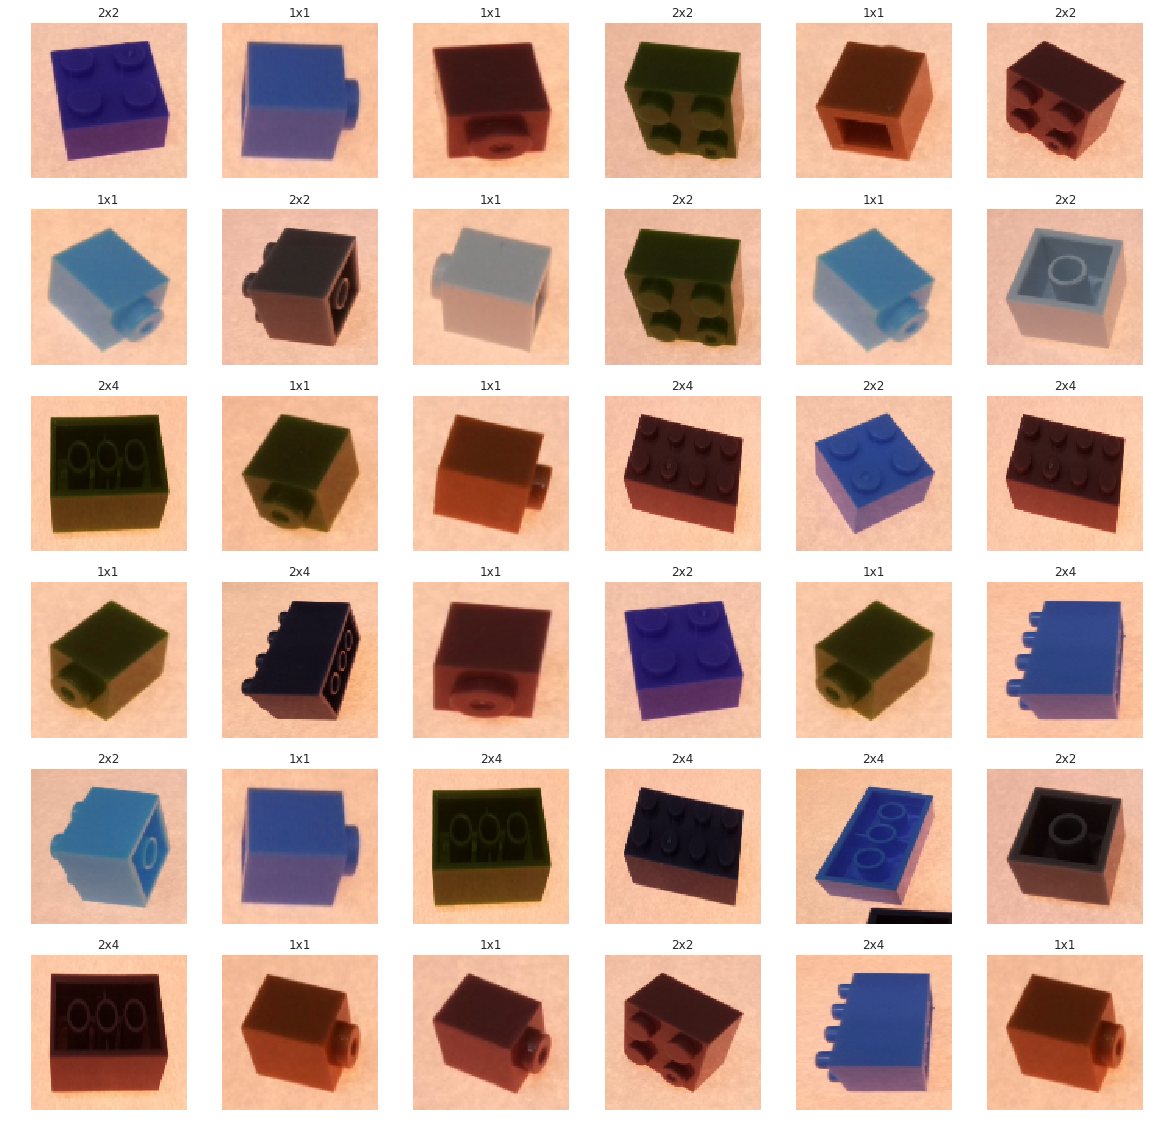

In [11]:
# =============================================================================
# test
# =============================================================================

s=100
X_test = []
y_test = []
for folder in  os.listdir(testpath +'lego_test') : 
    files = gb.glob(pathname= str( testpath +'lego_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        
print(f'we have {len(X_test)} items in X_test')


plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(getcode(y_test[i]))
    

we have 28 items in X_pred


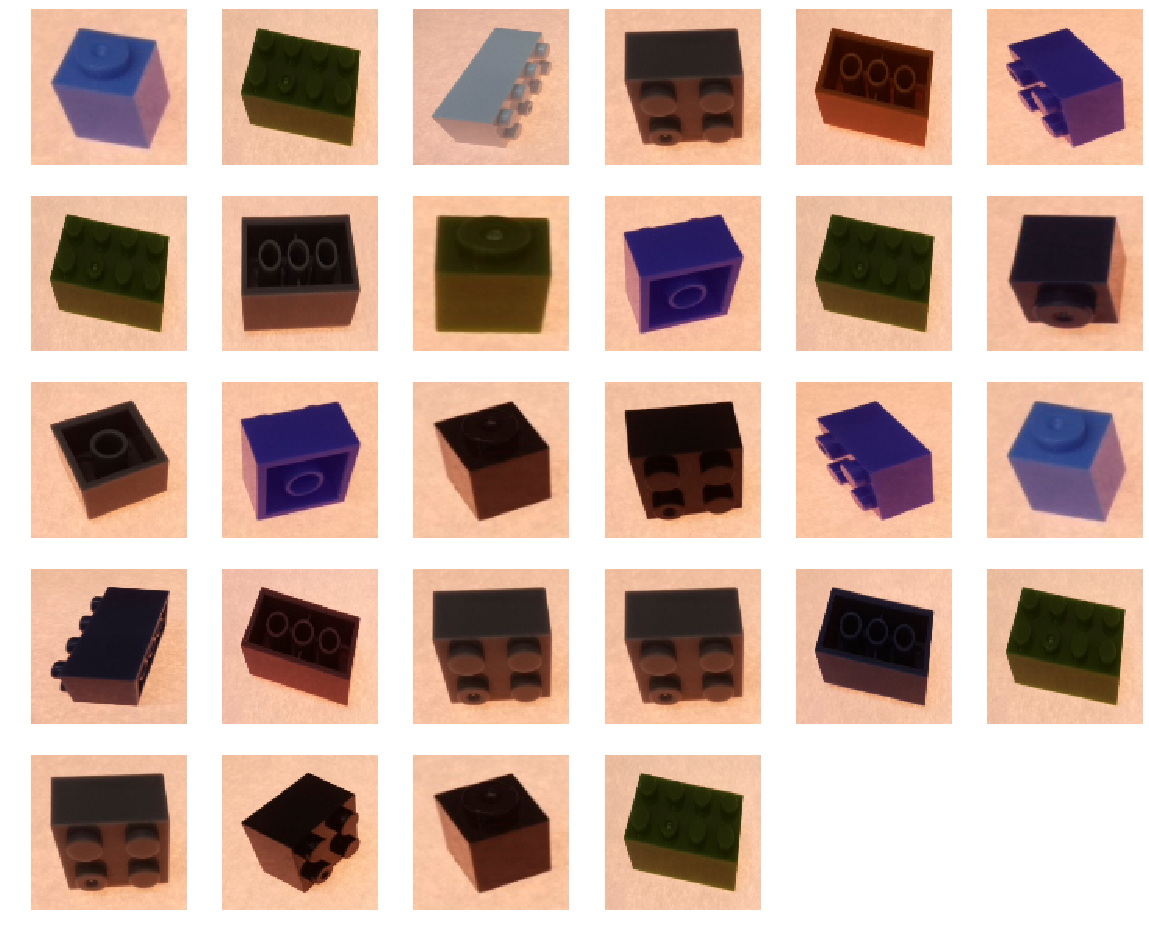

In [12]:
# =============================================================================
#     predect
# =============================================================================
X_pred = []
files = gb.glob(pathname= str(predpath + 'lego_predect/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))
    
    
print(f'we have {len(X_pred)} items in X_pred')
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),28))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [13]:
# =============================================================================
# 
# =============================================================================
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (198, 100, 100, 3)
X_test shape  is (66, 100, 100, 3)
X_pred shape  is (28, 100, 100, 3)
y_train shape  is (198,)
y_test shape  is (66,)


In [14]:
# =============================================================================
# 
# =============================================================================

KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])
    
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (Non

In [15]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
198/198 [==============================] - 29s 145ms/step - loss: 7.2043 - accuracy: 0.1717
Epoch 2/50
198/198 [==============================] - 27s 137ms/step - loss: 2.2382 - accuracy: 0.2828
Epoch 3/50
198/198 [==============================] - 28s 140ms/step - loss: 1.6999 - accuracy: 0.3030
Epoch 4/50
198/198 [==============================] - 27s 137ms/step - loss: 2.1230 - accuracy: 0.3535
Epoch 5/50
198/198 [==============================] - 28s 141ms/step - loss: 1.4785 - accuracy: 0.3434
Epoch 6/50
198/198 [==============================] - 27s 137ms/step - loss: 1.3774 - accuracy: 0.3838
Epoch 7/50
198/198 [==============================] - 28s 140ms/step - loss: 1.3392 - accuracy: 0.3889
Epoch 8/50
198/198 [==============================] - 27s 138ms/step - loss: 1.3682 - accuracy: 0.3182
Epoch 9/50
198/198 [==============================] - 27s 138ms/step - loss: 1.2830 - accuracy: 0.3636
Epoch 10/50
198/198 [==============================] - 28s 139ms/step - l

In [16]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

66/66 [==============================] - 3s 39ms/step
Test Loss is 0.4775160785877335
Test Accuracy is 0.7727272510528564


In [17]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (66, 6)


In [18]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (28, 6)


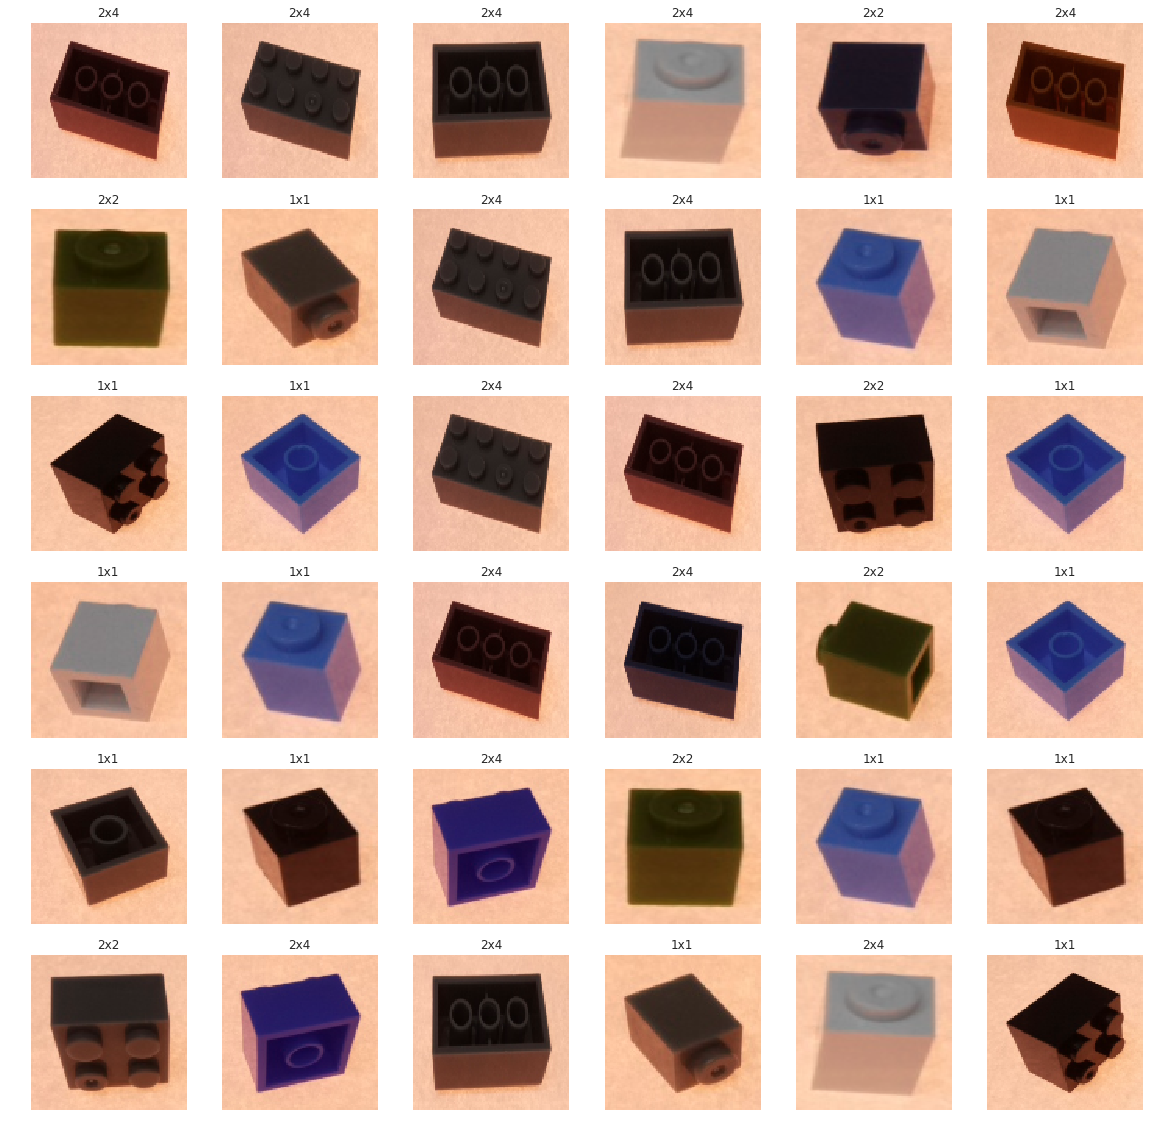

In [19]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))